# This notebook is an example for creating the ML-FRAMEWORK representations

In [9]:
%load_ext autoreload
%autoreload
from ExpDimRed import ExpDimRed
import sys
import pandas as pd
import scipy.stats as scy_stats
import numpy as np
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
#import math as mth
import matplotlib.pyplot as plt
from sklearn.preprocessing.data import normalize, minmax_scale, StandardScaler,\
    RobustScaler
import os
from IPython.extensions.autoreload import update_class
from matplotlib.pyplot import axis
import itertools
from scipy import stats, integrate
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [10]:
DimRedct_control=ExpDimRed('ControlEvalRML')
def dset_import(dataset_1,fault_1):
    '''
    import the two data sets need to conduct the control experiment
    '''
    rownames = ["unit", "cycle",
                "op_set1", "op_set2", "op_set3",
                "sm1", "sm2", "sm3", "sm4", "sm5", "sm6", "sm7", "sm8", "sm9", "sm10", "sm11",
                "sm12", "sm13", "sm14", "sm15", "sm16", "sm17", "sm18", "sm19", "sm20", "sm21"]   

    dataset_1 = pd.read_csv(dataset_1, sep=" ",
                            header=None, na_values='NaN',usecols=range(0,26), names=rownames, float_precision = 'None', memory_map = True)
    #convert time to count down
    for i in dataset_1.unit.unique():
        dataset_1[dataset_1.columns[1]].loc[dataset_1['unit']==i] = dataset_1[dataset_1.columns[1]].loc[dataset_1['unit']==i]-np.max(dataset_1[dataset_1.columns[1]].loc[dataset_1['unit']==i])

    dataset_1 = dataset_1.assign(faults=fault_1)

    return dataset_1

In [11]:
FD0002 =dset_import(dataset_1='train_FD002.txt',fault_1=1) #FD0002- 6 conditions/fault mode 1 (HPC Degradation)
FD0004 =dset_import(dataset_1='train_FD004.txt',fault_1=2) #FD0004- 6 conditions/Fault mode 1 and Fault mode 2 (HPC Degradation, Fan Degradation)


In [12]:
FD0004.head()

,unit,cycle,op_set1,op_set2,op_set3,sm1,sm2,sm3,sm4,sm5,...,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21,faults
0,1,-320,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,2
1,1,-319,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,2
2,1,-318,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,2
3,1,-317,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,2
4,1,-316,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,2


# Perform ML-FRAMEWORK dimension reduction

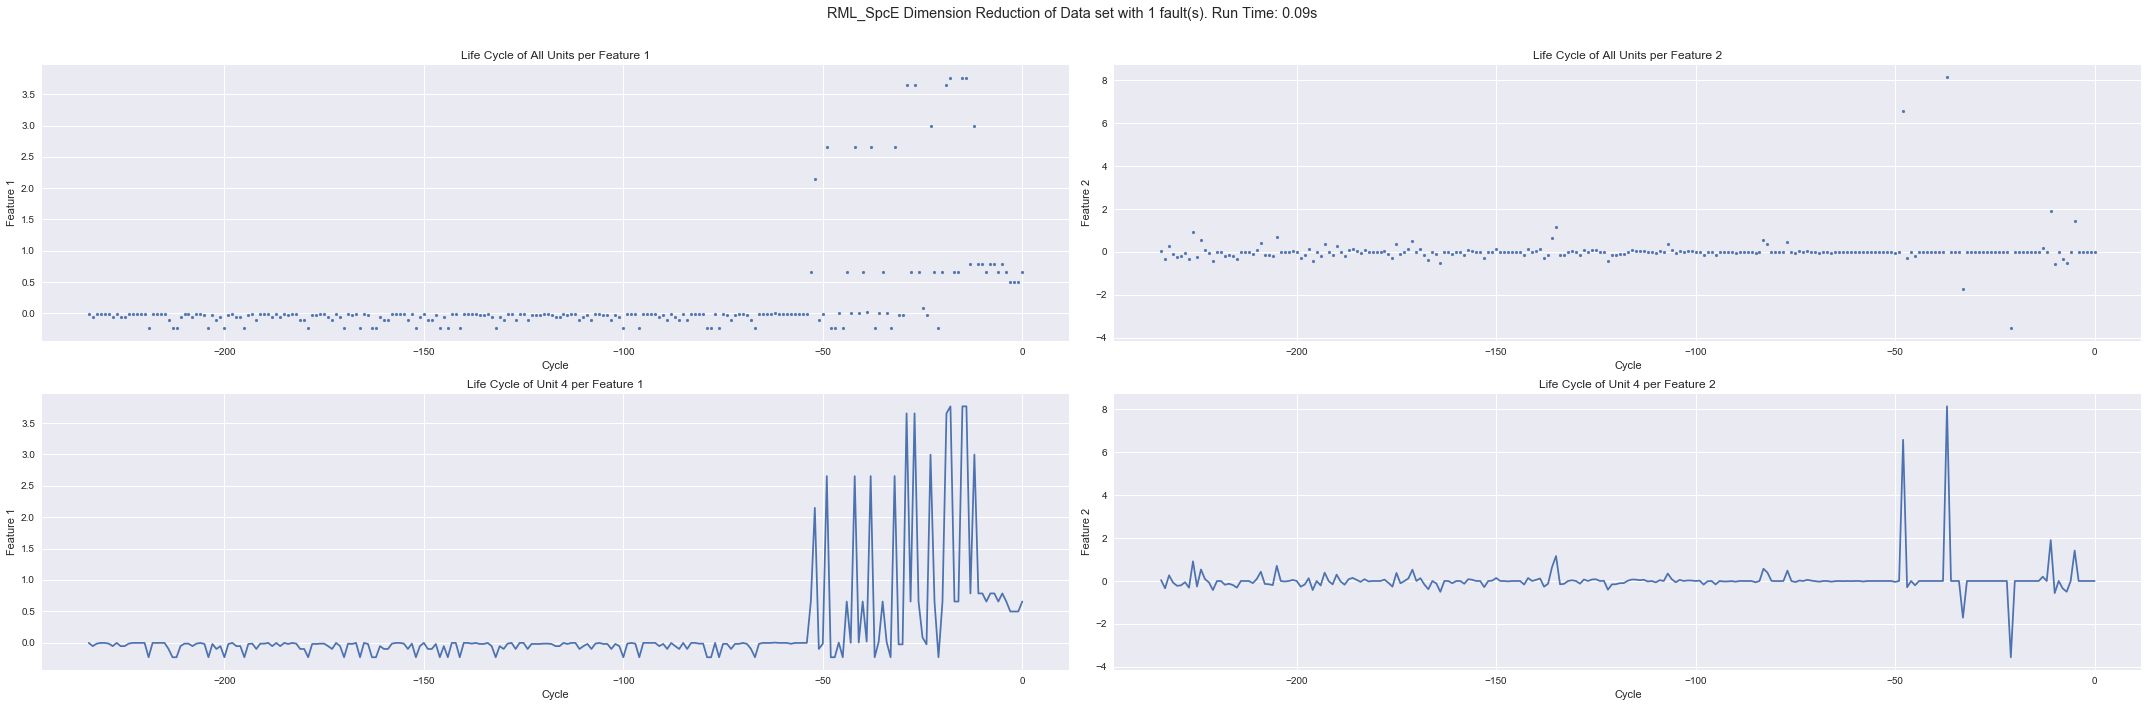

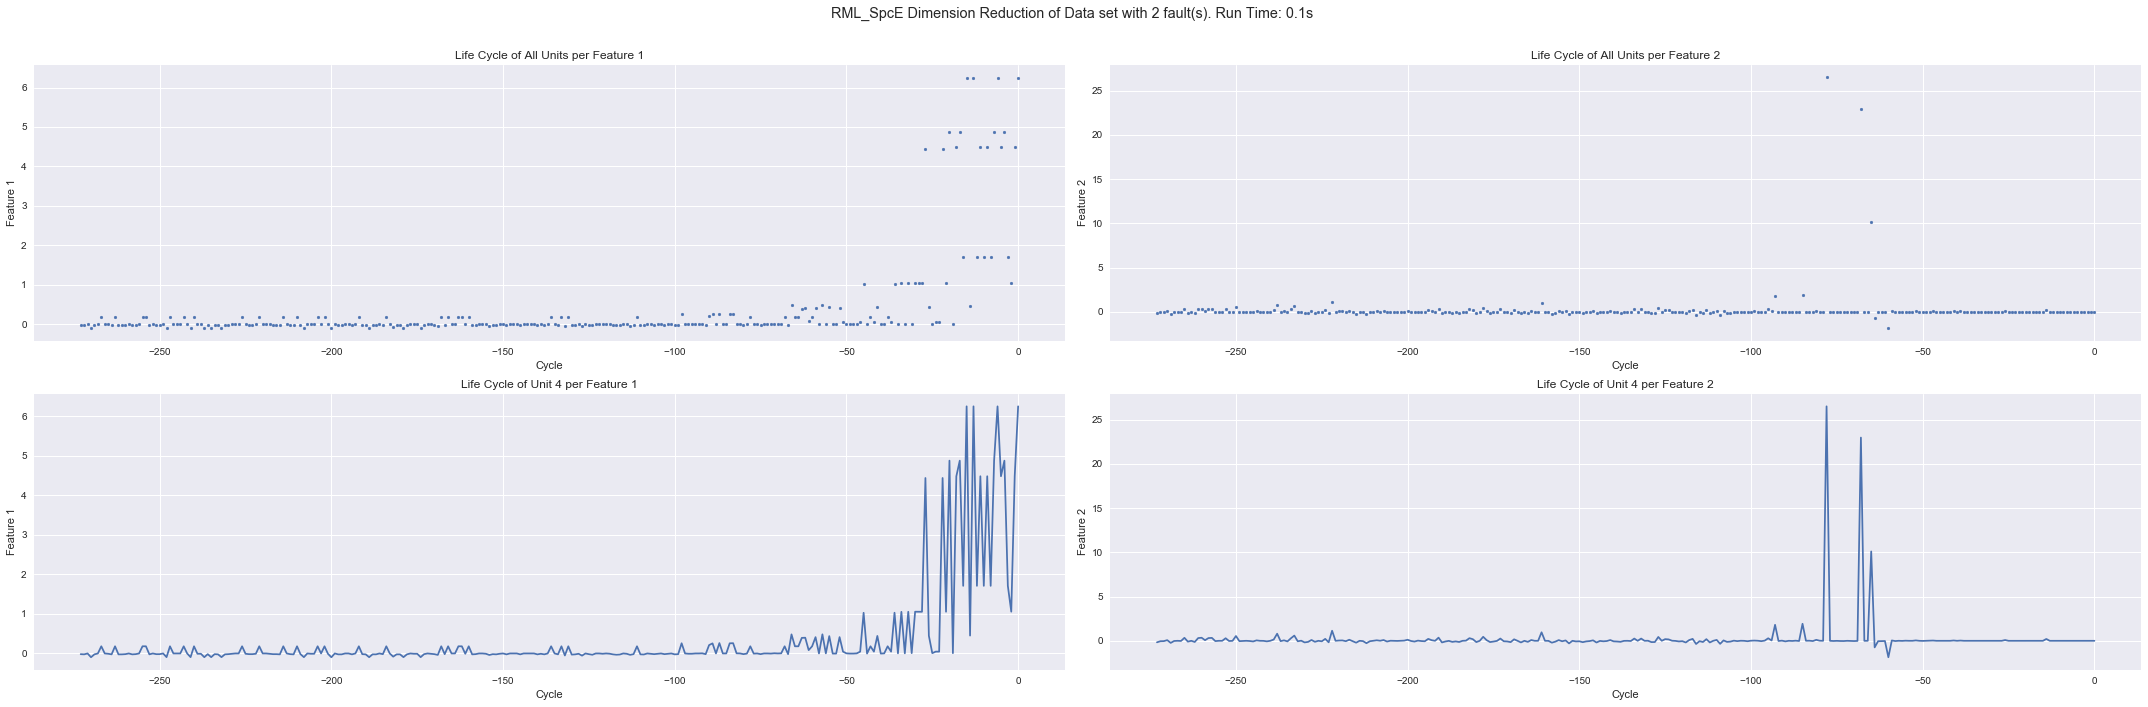

In [13]:
OD_SpcEAll = ExpDimRed('RML_SpcE').SpcE(FD0002.loc[FD0002.unit==4],plot='yes')#,saveto='RML/1fault');
#data with 2 faults _ 6 condtion
OD2_SpcEAll = ExpDimRed('RML_SpcE').SpcE(FD0004.loc[FD0004.unit==4],plot='yes')#,saveto='RML/2fault');